# HW-2

- Subject Name: Deep Learning
- Subject Code: CS 7150
- Professor Name: Jiaji Liu
- Student Name: Varun Guttikonda
- NUID: 002697400

## Problem 1

**(Sampled Softmax)** We talked about softmax classifier in the class. Suppose there are *C* classes. A softmax classifier takes a vector $\vec{x} \in \mathbb{R}^d$, computes logits:  

$$\vec{z_i} = \vec{w_i}^T\vec{x} + \vec{b_i}$$

then predicts the probability of class $i$ as:  

$$p_i = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}$$

where $\vec{w_i} \in \mathbb{R}^d$ and $\vec{b_i} \in \mathbb{R}, i=1,2,\dots,C$ are trainable parameters. They are trained by minimizing a cross entropy loss. Specifically a datum $\vec{x}$ with label *c* incurs a training loss of $$\mathcal{l} = - \log p_c$$

and we update the trainable parameters by Stochastic Gradient Descent (SGD).


### Question 1

Revisit the notes and derive the gradients $\frac{\partial l}{\partial w_i}, \frac{\partial l}{\partial b_i}$. Express them as function of $p_i$.

<span style='font-size: 25px; font-weight: bold;'>Answer</span>

$$\frac{\partial l}{\partial w_i} = -\log{p_i}\frac{\partial P_i}{\partial w_i}$$

$$\frac{\partial P_i}{\partial w_i} = \frac{x \cdot e^{z_i}\sum_{j=1}^C e^{z_j} - x \cdot e^{z_i}e^{z_i}}{(\sum_{j=1}^C e^{z_j})^2}$$

We get this by the differentiation rule: $\frac{d}{dx}\frac{f}{g} = \frac{f'g - fg'}{g^2}$.  



$$\frac{\partial P_i}{\partial w_i} = \frac{x \cdot e^{z_i}}{\sum_{j=1}^C e^{z_j}} - x \cdot \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}$$

$$\frac{\partial P_i}{\partial w_i} = x \cdot p_i - x \cdot p_i^2$$

$$\frac{\partial P_i}{\partial w_i} = x \cdot p_i(1 - p_i)$$

$$\frac{\partial l}{\partial w_i} = -\log{p_i} \cdot x \cdot p_i(1 - p_i)$$

If we send the negative sign inside the $(1 - p_i)$ term, we get:

$$\frac{\partial l}{\partial w_i} = \log{p_i} \cdot x \cdot p_i(p_i - 1)$$


Similarly, we can derive the gradient for $b_i$:

$$\frac{\partial l}{\partial b_i} = -\log{p_i}\frac{\partial P_i}{\partial b_i}$$

$$\frac{\partial P_i}{\partial b_i} = \frac{e^{z_i}\sum_{j=1}^C e^{z_j} - e^{z_i}e^{z_i}}{(\sum_{j=1}^C e^{z_j})^2}$$

$$\frac{\partial P_i}{\partial b_i} = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}} - \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}$$

$$\frac{\partial P_i}{\partial b_i} = p_i - p_i^2$$

$$\frac{\partial l}{\partial b_i} = -\log{p_i} \cdot p_i - p_i^2$$

$$\frac{\partial l}{\partial b_i} = -\log{p_i} \cdot p_i(1 - p_i)$$

If we send the negative sign inside the $(1 - p_i)$ term, we get:

$$\frac{\partial l}{\partial b_i} = \log{p_i} \cdot p_i(p_i - 1)$$

### Question 2
The denominator of $p_i$ requires to compute $C$ terms. That is, $e^{z_j}, j = 1, 2,\dots, C$. When *C* is big, this can incur tremendous computational cost.  

Sampled softmax alleviates this by randomly sampling $K (K << C)$ of these terms to approximate $p_i$. Specifically, we choose a distribution with probability mass function *q* over the *C* classes. We draw *K* class ID's from *q*. Denote this set of sampled class ID's as $\mathcal{S}$, and assume class *i* itself is excluded from $\mathcal{S}$. We can then approximate the denominator by:  

$$\sum_{j=1}^{C} e^{z_j} \approx e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j}$$

Then $p_i$ is approximated by:  

$$\hat{p_i} = \frac{e^{z_j}}{e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j}}$$

The approximated training loss is therefore:  

$$\hat{\mathcal{l}} = - \log \hat{p_c}$$

Derive the gradients $\frac{\partial \hat{\mathcal{l}}}{\partial w_i}, \frac{\partial \hat{\mathcal{l}}}{\partial b_i}$.

<span style='font-size: 25px; font-weight: bold;'>Answer</span>

$$\frac{\partial \hat{\mathcal{l}}}{\partial w_i} = -\log{\hat{p_i}}\frac{\partial \hat{P_i}}{\partial w_i}$$

$$\frac{\partial \hat{P_i}}{\partial w_i} = \frac{x \cdot e^{z_i}(e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j}) - x \cdot e^{2z_i} - \frac{xq_j}{K} e^{2z_i}}{(e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j})^2}$$

The final simplification produces:
$$\frac{\partial \hat{P_i}}{\partial w_i} = x \cdot \frac{e^{z_i}}{e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j}} - x \cdot \frac{e^{2z_i} + \frac{q_j}{K} e^{2z_i}}{(e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j})^2}$$

which simplifies to:
$$x \cdot \hat{P_i} \cdot (1 - \hat{P_i}(1 - \frac{q_j}{K}))$$

So the total gradient is:
$$\frac{\partial \hat{\mathcal{l}}}{\partial w_i} = -\log{\hat{p_i}} \cdot x \cdot \hat{P_i} \cdot (1 - \hat{P_i}(1 - \frac{q_j}{K}))$$

Similarly, we can derive the gradient for $b_i$:

$$\frac{\partial \hat{\mathcal{l}}}{\partial b_i} = -\log{\hat{p_i}}\frac{\partial \hat{P_i}}{\partial b_i}$$

$$\frac{\partial \hat{P_i}}{\partial b_i} = \frac{e^{z_i}(e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j}) - e^{2z_i} - \frac{q_j}{K} e^{2z_i}}{(e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j})^2}$$

The final simplification produces:
$$\frac{\partial \hat{P_i}}{\partial b_i} = \frac{e^{z_i}}{e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j}} - \frac{e^{2z_i} + \frac{q_j}{K} e^{2z_i}}{(e^{z_i} + \frac{1}{K}\sum_{j \in \mathcal{S}}q_je^{z_j})^2}$$

which simplifies to:

$$\hat{P_i} \cdot (1 - \hat{P_i}(1 - \frac{q_j}{K}))$$

So the total gradient is:
$$\frac{\partial \hat{\mathcal{l}}}{\partial b_i} = -\log{\hat{p_i}} \cdot \hat{P_i} \cdot (1 - \hat{P_i}(1 - \frac{q_j}{K}))$$

## Problem 2

**Linear Classifier v.s. MLP**: In this exercise, we compare softmax classifier with and without MLP feature extractor. Please attach all code.  

We will use MNIST dataset through out. MNIST are `28 x 28` images of hand-written digits. The training partition has 60,000 images and test partition has 10,000 images. Use the following code snippet to further split the training partition into a training set and a validation set. 

```python
import torch
from torchvision import datasets

train_all = datasets.MNIST('../data', train=True, download=True) # 60K images
train_data, val_data = torch.utils.data.random_split(train_all, [50000, 10000], torch.Generator().manual_seed(0)) # train: 50K; val: 10K
test_data = datasets.MNIST('../data', train=False) # 10K images
```

#### Note

Although the problem is suggesting to use `PyTorch`, the course and the professor have assured that we can use any framework of our choice. I have used `TensorFlow` for this problem. Please note that the API and the methodology used in `TensorFlow` is not very similar to `PyTorch`. The outputs that I achieve are very similar to the ones that are expected.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Define Jupyter Magics
%matplotlib inline

# Define HYPERPARAMETERS, constants etc
EPOCHS = 5
BATCH_SIZE = 64
RANDOM_SEED = 0
TRAINING_DATA_SIZE = 50_000
VALIDATION_DATA_SIZE = 10_000
SHOULD_SHUFFLE = True

In [2]:
# Create a train, test and val dataset from a numpy array

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Create Datasets as given by snippet (use same names)

train_all = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_data, val_data = keras.utils.split_dataset(
    train_all,
    left_size=TRAINING_DATA_SIZE,  # 50,000
    right_size=VALIDATION_DATA_SIZE,  # 10,000
    seed=RANDOM_SEED,  # 0
    shuffle=SHOULD_SHUFFLE,  # True
)

train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

### Question 1
Build a 10-class softmax classifier of the images. Train the classifier via `Stochastic Gradient Descent (SGD)` and report the test accuracy.

In [4]:
simple_model = keras.Sequential(
    [
        keras.layers.Input(shape=(28, 28)),
        keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input to a vector
        keras.layers.Dense(10, activation="softmax"),
    ]
)

simple_model.compile(
    optimizer="sgd",  # Use stochastic gradient descent with lr of 0.01
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = simple_model.fit(
    train_data, epochs=EPOCHS, validation_data=val_data, verbose=0
)

In [5]:
loss, accuracy = simple_model.evaluate(test_data)

print(f"The accuracy is: {accuracy:.2f}")

157/157 [==============================] - 0s 289us/step - loss: 0.3959 - accuracy: 0.8942
The accuracy is: 0.89


### Question 2
Insert one hidden layer with 1024 hidden units before the softmax classifer. Use `ReLU` as the activation function at the hidden layer. Train and report the test accuracy.

In [6]:
simple_hidden_model = keras.Sequential(
    [
        keras.layers.Input(shape=(28, 28)),
        keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input to a vector
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

simple_hidden_model.compile(
    optimizer="sgd",  # Use stochastic gradient descent with lr of 0.01
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = simple_hidden_model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data,
    verbose=0,
)

In [7]:
loss, accuracy = simple_hidden_model.evaluate(test_data)

print(f"The accuracy is: {accuracy:.2f}")

157/157 [==============================] - 0s 853us/step - loss: 0.2705 - accuracy: 0.9252
The accuracy is: 0.93


### Question 3
Let us count the number of learnable parameters in the above model:  
- input-to-hidden-layer weight matrix: $28^2 \times 1024$
- input-to-hidden-layer bias: $1024$
- softmax classifier weight matrix: $1024 \times 10$
- softmax classifier bias: $10$

So the total number of learnable parameters are:  

$$(28^2 \times 1024) + 1024 + (1024 \times 10) + 10 = 814,090$$

Now instead of inserting one hidden layer, we insert $\mathcal{L} (\mathcal{L} \ge 2)$ hidden layers, each with equal number of hidden units. We keep the total learnable parameters at $814,090$. Derive the number of hidden units per layer. Expresss it as a function of $\mathcal{L}$.

<span style="font-size: 28px;font-weight:bold;">Answer:</span>

Let the number of hidden units in each hidden layer be $k$. Let's count the number of learnable parameters for $\mathcal{L}$ hidden layers.

For $\mathcal{L} = 2$, we have: $(784 \times k) + k + (k \times 10) + 10$.  

For $\mathcal{L} = 3$, we have: $(784 \times k) + k + (k \times k) + k + (k \times 10) + 10$.  

For $\mathcal{L} = 4$, we have: $(784 \times k) + k + (k \times k) + k + (k \times k) + k + (k \times 10) + 10$.  

By mathematical induction, we can say that for $\mathcal{L}$ hidden layers, the number of learnable parameters is:
$$(784 \times k + k) + (\mathcal{L} - 1)\times(k \times k + k) + (k \times 10 + 10) \forall \mathcal{L} \ge 2$$

This equations simplifies to:
$$k^2 \times (\mathcal{L} - 1) + k \times (\mathcal{L} + 794) + 10$$

Now we want to keep the total number of learnable parameters to be $814,090$. So we have:
$$k^2 \times (\mathcal{L} - 1) + k \times (\mathcal{L} + 794) + 10 = 814,090$$

which simplifies to:
$$k^2 \times (\mathcal{L} - 1) + k \times (\mathcal{L} + 794) - 814,080 = 0$$

Solving this quadratic equation, we get the number of hidden units per layer as a function of number of layers where we want to keep the total number of learnable parameters to be $814,090$.

Thus the number of hidden units per layer is:
$$ k = \frac{-(\mathcal{L} + 794) \pm \sqrt{(\mathcal{L} + 794)^2 - (4 \times (\mathcal{L} - 1) \times (- 814,080))}}{2 \times (\mathcal{L} - 1)}$$

Gotchas:
1. If the number of hidden units per layer is a decimal, we can round it off to the nearest integer.
2. If the number of hidden units per layer is negative, we can take the absolute value of it.

### Question 4 (Bonus)

Train a MLP model with architecture defined in Question 3 whree $\mathcal{L} = 2,3,\dots,8$. Get the test accuracy for each $\mathcal{L}$. Note that in Question 2, we already get the accuracy for $\mathcal{L} = 1$. Plot the accuracy against $\mathcal{L}$, where $\mathcal{L} = 1,2,3,\dots,8$.

In [8]:
n_hidden_layers = list(range(1, 9))
accuracies = [0] * len(n_hidden_layers)

for idx, n_hidden_layer in enumerate(n_hidden_layers):
    hidden_layers = [
        keras.layers.Dense(1024, activation="relu") for _ in range(n_hidden_layer)
    ]

    model = keras.Sequential(
        [
            keras.layers.Input(shape=(28, 28)),
            keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input to a vector
            *hidden_layers,
            keras.layers.Dense(10, activation="softmax"),
        ]
    )

    model.compile(
        optimizer="sgd",  # Use stochastic gradient descent with lr of 0.01
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, verbose=0)

    loss, accuracy = model.evaluate(test_data)

    accuracies[idx] = accuracy

157/157 [==============================] - 1s 5ms/step - loss: 0.1332 - accuracy: 0.9582


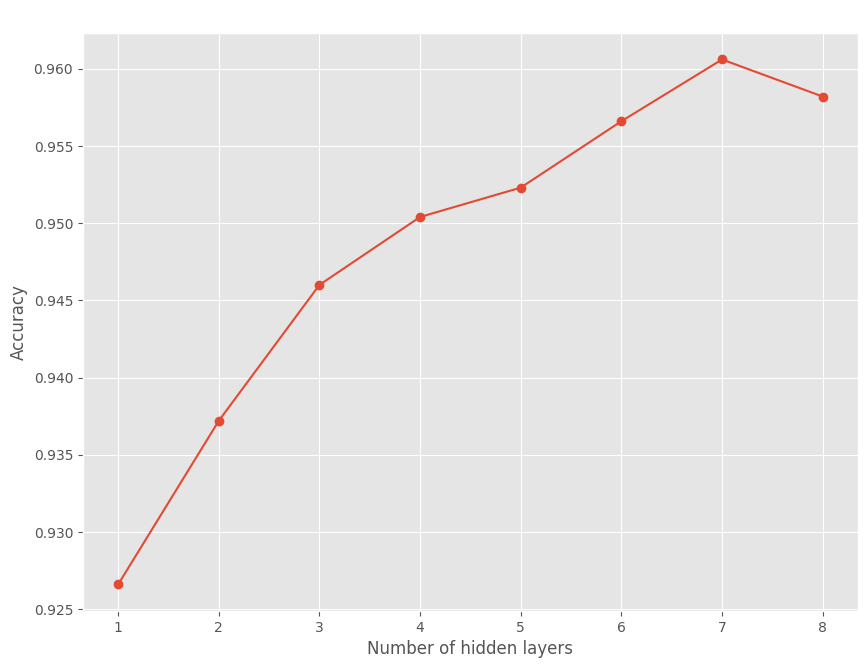

In [12]:
# Plot the accuracies
plt.style.use("fast")
plt.figure(figsize=(10, 7.5))
plt.plot(n_hidden_layers, accuracies, marker="o")
plt.title("Accuracy vs Number of hidden layers")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()